In [1]:
import pandas as pd

In [28]:
df = pd.read_json("house.json")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14107 entries, 0 to 14106
Data columns (total 6 columns):
bednumber    14107 non-null object
building     14107 non-null object
city         14107 non-null object
soldDate     14107 non-null object
soldPrice    14107 non-null object
soldType     14107 non-null object
dtypes: object(6)
memory usage: 661.3+ KB


### Clean the Data

In [30]:
# Extract postcode
df["postcode"] = df.loc[:, "building"].str.extract("(\w\w\w{1,2} \d\w\w$)")

In [31]:
# Process propertyType, duration, and isNew
t_d_r = df.soldType.str.split(",", expand=True)

t_d_r.columns = ["propertyType", "duration", "residential"]

t_d_r["isNew"] = t_d_r["residential"].str.extract("(New Build)")

t_d_r.loc[t_d_r["isNew"].notnull(), "isNew"] = 1
t_d_r.loc[t_d_r["isNew"].isnull(), "isNew"] = 0

t_d_r.loc[t_d_r["duration"] == " Freehold", "duration"] = 1
t_d_r.loc[t_d_r["duration"] == " Leasehold", "duration"] = 0
t_d_r["duration_free_not_lease"] = t_d_r["duration"]
t_d_r.drop(columns="duration", inplace=True)

df = pd.concat([df, t_d_r], axis=1, sort=False)
df.drop(columns=["residential", "soldType"], inplace=True)

In [32]:
# process soldPrice
df["soldPrice"] = df["soldPrice"].str.extract("([\d+,]+\d+)")

df["soldPrice"] = df["soldPrice"].str.split(",").str.join("")

df["soldPrice"] = df["soldPrice"].astype(int)

In [33]:
# process soldDate, soldYear
df["soldDate"] = pd.to_datetime(df.soldDate)

df["soldyear"] = df["soldDate"].dt.year

print(df["soldyear"].value_counts())

df = df[df["soldyear"] >= 2011]

2018    5362
2017    2751
2016    1761
2019    1547
2015    1038
2014     681
2013     311
2012     153
2010     152
2011     129
2009     106
2007      60
2008      41
2006      15
Name: soldyear, dtype: int64


In [34]:
# process bednumber
df["bednumber"] = df["bednumber"].str.extract("(\d+)").astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13733 entries, 0 to 14106
Data columns (total 10 columns):
bednumber                  13733 non-null int32
building                   13733 non-null object
city                       13733 non-null object
soldDate                   13733 non-null datetime64[ns]
soldPrice                  13733 non-null int32
postcode                   13733 non-null object
propertyType               13733 non-null object
isNew                      13733 non-null object
duration_free_not_lease    13733 non-null object
soldyear                   13733 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(1), object(6)
memory usage: 1.0+ MB


### EDA

In [37]:
df3 = pd.DataFrame(df)

In [38]:
df2.shape

(16947, 10)

In [39]:
df3.shape

(13733, 10)

In [42]:
df = df2.append(df3)

In [27]:
df2 = pd.DataFrame(df)

In [44]:
df[df["isNew"] == 1]

,bednumber,building,city,soldDate,soldPrice,postcode,propertyType,isNew,duration_free_not_lease,soldyear
479,4,"Wishing Well House, 2, The Paddock, Banwell, N...",Banwell,2014-02-04,420000,BS29 6DH,Detached,1,1,2014
1858,3,"3, Longmead Terrace, Bath, Bath And North East...",Bath-Spa,2016-04-25,585000,BA2 3WN,Terraced,1,1,2016
1870,4,"12, Longmead Terrace, Bath, Bath And North Eas...",Bath-Spa,2016-03-31,720000,BA2 3WN,Terraced,1,1,2016
2509,2,"1a, Avonvale Place, Batheaston, Bath, Bath And...",Batheaston,2012-12-19,210000,BA1 7RF,Terraced,1,0,2012
2522,3,"1, Lower Northend, Batheaston, Bath, Bath And ...",Batheaston,2012-08-31,243000,BA1 7EZ,Semi-Detached,1,1,2012
3009,5,"5, Valley View, Beckington, Frome, Somerset BA...",Beckington,2018-04-16,1070000,BA11 6AS,Detached,1,1,2018
3027,5,"20, Great Dunns Close, Beckington, Frome, Some...",Beckington,2016-06-17,684945,BA11 6AF,Detached,1,1,2016
3030,5,"28, Great Dunns Close, Beckington, Frome, Some...",Beckington,2016-03-22,723995,BA11 6AF,Detached,1,1,2016
3033,4,"33, Great Dunns Close, Beckington, Frome, Some...",Beckington,2016-01-29,404995,BA11 6AF,Detached,1,1,2016
3038,2,"4, Great Dunns Close, Beckington, Frome, Somer...",Beckington,2015-08-21,219995,BA11 6AF,Terraced,1,1,2015


In [57]:
len(df["postcode"].unique())

8911

In [46]:
groupbyobj = df.groupby(["postcode", "bednumber", "propertyType", "duration_free_not_lease", "isNew"])

diff = groupbyobj["soldPrice"].max() - groupbyobj["soldPrice"].min()

diff = diff[diff > 0]

diff = diff.reset_index()

diff = diff.sort_values("soldPrice", ascending=False)

In [49]:
diff.describe()

,bednumber,duration_free_not_lease,isNew,soldPrice
count,5247.000000,5247.000000,5247.000000,5.247000e+03
mean,2.899752,0.904517,0.009529,5.277902e+04
std,0.836554,0.293909,0.097161,6.049347e+04
min,0.000000,0.000000,0.000000,5.000000e+01
25%,2.000000,1.000000,0.000000,1.700000e+04
50%,3.000000,1.000000,0.000000,3.500000e+04
75%,3.000000,1.000000,0.000000,6.700000e+04
max,7.000000,1.000000,1.000000,1.030000e+06


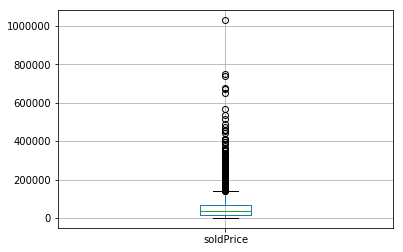

In [47]:
diff.boxplot(column="soldPrice")

In [50]:
sum(diff["soldPrice"] > 6.7e4)

1302

In [51]:
diff_outlier = diff[diff["soldPrice"] > 6.7e4]

df_outliers = pd.DataFrame(columns=df.columns)

for i, row in diff_outlier.iterrows():
    df_outliers = df_outliers.append(df[(df["postcode"] == row["postcode"]) & 
                             (df["propertyType"] == row["propertyType"]) & 
                             (df["bednumber"] == row["bednumber"]) &
                             (df["duration_free_not_lease"] == row["duration_free_not_lease"]) &
                             (df["isNew"] == row["isNew"])])

In [52]:
df_outliers

,bednumber,building,city,soldDate,soldPrice,postcode,propertyType,isNew,duration_free_not_lease,soldyear
2285,2,"176, Bailbrook Lane, Bath, Bath And North East...",Batheaston,2018-02-28,620000,BA1 7AA,Semi-Detached,0,1,2018
2387,2,"Batheaston Villa, 172, Bailbrook Lane, Bath, B...",Batheaston,2015-12-08,1650000,BA1 7AA,Semi-Detached,0,1,2015
2442,5,"Cotswold House, Bannerdown Road, Batheaston, B...",Batheaston,2014-09-17,1100000,BA1 7LA,Detached,0,1,2014
2560,5,"Bannerdown House, Bannerdown Road, Batheaston,...",Batheaston,2011-06-30,1850000,BA1 7LA,Detached,0,1,2011
5128,4,"High Orchard, Ralph Allen Drive, Bath, Bath An...",Combe-Down,2017-09-01,1170000,BA2 5AE,Detached,0,1,2017
5211,4,"Hadley Cottage, Ralph Allen Drive, Bath, Bath ...",Combe-Down,2016-08-31,710000,BA2 5AE,Detached,0,1,2016
5382,4,"Stonecroft, Ralph Allen Drive, Bath, Bath And ...",Combe-Down,2014-06-06,430000,BA2 5AE,Detached,0,1,2014
3576,4,"160, Brent Street, Brent Knoll, Highbridge, So...",Brent-Knoll,2018-08-24,500000,TA9 4BE,Detached,0,1,2018
3591,4,"152, Brent Street, Brent Knoll, Highbridge, So...",Brent-Knoll,2017-05-31,777500,TA9 4BE,Detached,0,1,2017
3620,4,"169, Brent Street, Brent Knoll, Highbridge, So...",Brent-Knoll,2014-07-23,560000,TA9 4BE,Detached,0,1,2014


In [53]:
len(df)

30680

In [54]:
len(df_outliers)

4976

In [55]:
df.drop(index=df_outliers.index, inplace=True)

In [56]:
len(df)

22870

In [58]:
postcode_lat_long = pd.read_csv("ukpostcodes.csv")

In [59]:
postcode_lat_long.drop(columns='id', inplace=True)

In [60]:
df = pd.merge(df, postcode_lat_long, how='left', left_on="postcode", right_on="postcode")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22870 entries, 0 to 22869
Data columns (total 12 columns):
bednumber                  22870 non-null int32
building                   22870 non-null object
city                       22870 non-null object
soldDate                   22870 non-null datetime64[ns]
soldPrice                  22870 non-null int32
postcode                   22870 non-null object
propertyType               22870 non-null object
isNew                      22870 non-null object
duration_free_not_lease    22870 non-null object
soldyear                   22870 non-null int64
latitude                   22870 non-null float64
longitude                  22870 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(6)
memory usage: 2.1+ MB


In [62]:
data = df.loc[:, ["soldPrice", "bednumber", "propertyType", "duration_free_not_lease", "isNew", "latitude", "longitude"]]

In [63]:
data.to_csv("data2.csv")

In [64]:
data

,soldPrice,bednumber,propertyType,duration_free_not_lease,isNew,latitude,longitude
0,155000,2,Flat,0,0,51.286798,-2.820970
1,253000,3,Semi-Detached,1,0,51.288002,-2.814496
2,347500,4,Detached,1,0,51.287815,-2.813015
3,320000,4,Detached,1,0,51.286798,-2.822261
4,234000,2,Detached,1,0,51.287799,-2.810176
5,219000,2,Terraced,1,0,51.287296,-2.815401
6,343000,4,Detached,1,0,51.288177,-2.811358
7,151500,2,Flat,0,0,51.285478,-2.816930
8,580000,6,Terraced,1,0,51.287640,-2.821185
9,230000,2,Semi-Detached,1,0,51.286836,-2.819365
